In [34]:
# AYU CODE
from scipy import fft
from qtn.bimax import BiMax
from qtn.util import (boltzmann, emass, echarge, permittivity, cspeed, fperp, fp)
import numpy as np
import mpmath as mp
import matplotlib.pyplot as plt
from pyspedas import wind
from pytplot import tplot, get_data
%matplotlib inline

In [118]:
def custom_range(start, stop, increment=1):
    def genf(start, stop, increment=1):
        while start < stop:
            yield start
            start += increment
    return list(genf(start, stop, increment))

In [2]:
ant_len = 50      # m (monopole) 
ant_rad = 1.9e-4  # m
base_cap = 20e-12 # Farad
fbins = np.array([4000*1.0445**i for i in range(96)])

In [3]:
vsw=3.966e5
tc = 9.91 * echarge/boltzmann
t = 6.57
n = 0.026
tep = 9.91/9.62
tp = 9.62
fpe = 31.47e3

In [4]:
ne = 12.28e6
nc = ne/(1+n)
ldc = np.sqrt(permittivity * boltzmann * tc/ nc / echarge**2)
lrel = ant_len/ldc

In [5]:
p = BiMax(ant_len, ant_rad, base_cap)

In [6]:
wrelplot = fbins/fpe

In [7]:
g_s = np.array([p.gamma_shot(wrel, lrel, n, t, tc) for wrel in wrelplot])

In [8]:
def helper(wrel):
    """
    add precision control to bimax function.
    
    """
    if wrel > 1 and wrel < 1.2:
        mp.mp.dps = 40
    else:
        mp.mp.dps = 20
    return p.bimax(wrel, lrel, n, t, tc)

In [9]:
enoise = np.array([helper(wrel) for wrel in wrelplot])

In [10]:
#Modified
pnoise = np.array([p.proton(wrel*np.sqrt(1+n), ne, n, t, tp, tc, vsw) for wrel in wrelplot])


In [11]:
gamma = g_s[:, 0]
shot = g_s[:, 1]
vr2 = enoise + pnoise + shot

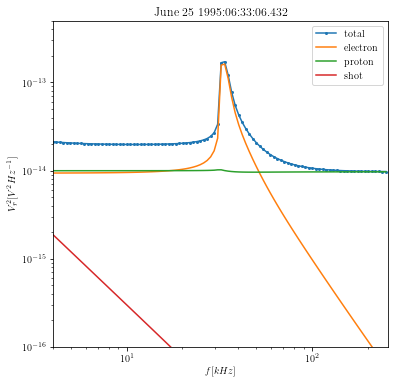

In [12]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure(figsize=[6, 6])
plt.plot(fbins/1000, vr2/gamma, 'o-', markersize=2, label='total')
plt.plot(fbins/1000, enoise/gamma, label='electron')
plt.plot(fbins/1000, pnoise/gamma, label='proton')
plt.plot(fbins/1000, shot/gamma, label='shot')
plt.xscale('log')
plt.yscale('log')
plt.xlim([4, 256])
plt.ylim([1e-16, 5e-13])
plt.xlabel(r'$f[kHz]$')
plt.ylabel(r'$V_r^2[V^2Hz^{-1}]$')
plt.title('June 25 1995:06:33:06.432')
plt.legend(loc='best')
plt.show()

In [13]:
fig.savefig('wind1.png', dpi=300)

In [14]:
from scipy.io.idl import readsav

02-Jun-22 07:27:16: /tmp/ipykernel_2648/251538259.py:1: DeprecationWarning: Please use `readsav` from the `scipy.io` namespace, the `scipy.io.idl` namespace is deprecated.
  from scipy.io.idl import readsav



In [138]:
#m_dat=readsav('/Users/Tong/Google Drive/research/data/meudon_tnr/TNR_XY_ACE_19950625.sav')
data = wind.threedp(trange=['1995-6-25/06:33:06.432', '1995-6-26/06:33:07.904'], get_support_data=True, time_clip=True)
data

02-Jun-22 08:37:05: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/wind/3dp/3dp_emfits_e0/1995/
02-Jun-22 08:37:06: File is current: wind_data/3dp/3dp_emfits_e0/1995/wi_emfits_e0_3dp_19950625_v01.cdf
02-Jun-22 08:37:07: File is current: wind_data/3dp/3dp_emfits_e0/1995/wi_emfits_e0_3dp_19950626_v01.cdf


Time clip was applied to: N_e_dens_wi_3dp
Time clip was applied to: T_e_par_wi_3dp
Time clip was applied to: T_e_perp_wi_3dp
Time clip was applied to: Q_e_par_wi_3dp
Time clip was applied to: V_e_xyz_gse_wi_3dp
Time clip was applied to: Quality0_wi_3dp


['Epoch',
 'N_e_dens_wi_3dp',
 'T_e_par_wi_3dp',
 'T_e_perp_wi_3dp',
 'Q_e_par_wi_3dp',
 'V_e_xyz_gse_wi_3dp',
 'Quality0_wi_3dp']

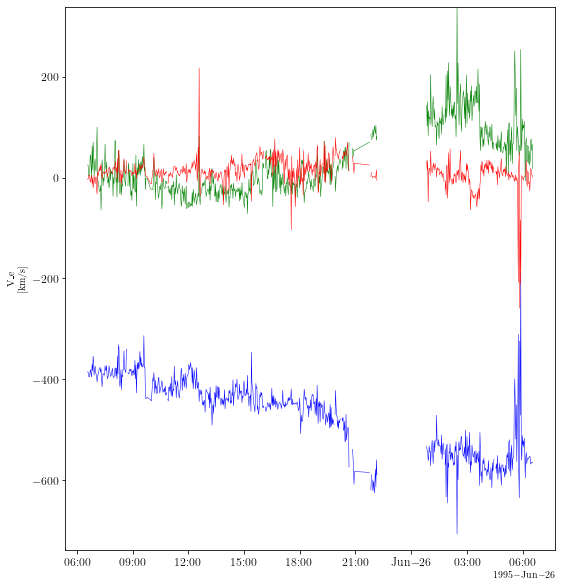

In [143]:
tplot(['V_e_xyz_gse_wi_3dp'])

In [141]:
export_data = get_data('V_e_xyz_gse_wi_3dp')
min(range(len(export_data.times)), key=lambda x: abs(804061986.432-export_data.times[x]))


0

ValueError: x and y must have same first dimension, but have shapes (1332,) and (1331,)

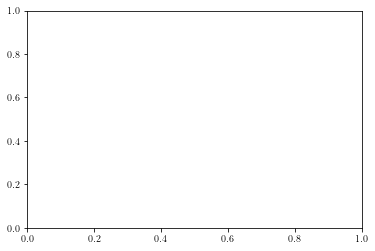

In [142]:
first = export_data.times[0]//1
last = export_data.times[-1]//1
plt.plot(custom_range(first, last,(last-first)/len(x)),x)
plt.plot(export_data.times, export_data.y)

02-Jun-22 08:25:37: /home/ayushmaan/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)



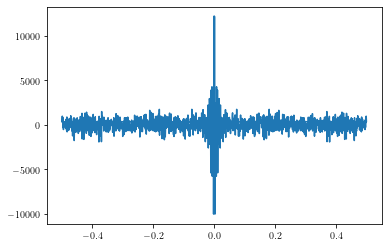

In [125]:
x = list(map(lambda x: x[0]+470, export_data.y))
y = list(map(lambda x: x[1], export_data.y))
z = list(map(lambda x: x[2], export_data.y))
x = list(filter(lambda x: not np.isnan(x), x))
y = list(filter(lambda x: not np.isnan(x), y))
z = list(filter(lambda x: not np.isnan(x), z))
len(x)
spectra_val_x = fft.fft(x)
freq = fft.fftfreq(len(spectra_val_x))
plt.plot(freq, (spectra_val_x))

In [46]:
m_data=m_dat['data']
mt = m_data['timeur8'][0]
mtag = m_data['time'][0]

NameError: name 'm_dat' is not defined

In [ ]:
mtag[5224]

In [ ]:
spec = m_data['spectra'][0][:, 5224]
spec = 10. ** (spec/10.)

In [ ]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure(figsize=[6, 6])
plt.plot(fbins/1000, vr2/gamma, label='theory')
#plt.plot(fbins/1000, enoise/gamma, label='electron')
#plt.plot(fbins/1000, pnoise/gamma, label='proton')
#plt.plot(fbins/1000, shot/gamma, label='shot')
plt.plot(fbins/1000, spec[:95], 'o', markersize=3, label='WIND data')
plt.xscale('log')
plt.yscale('log')
plt.xlim([4, 256])
plt.ylim([1e-16, 5e-13])
plt.xlabel(r'$f[kHz]$')
plt.ylabel(r'$V_r^2[V^2Hz^{-1}]$')
plt.title('June 25 1995:06:33:06.432')
plt.legend(loc='best')
plt.show()

In [ ]:
fig.savefig('wind1.png', dpi=300)

In [ ]:
vsw=7.61e5
tc = 11.53 * echarge/boltzmann
t = 5.57
n = 0.059
tep = 11.53/47.49
fpe = 22.24e3
te = tc * (1 + n)/(1 + n/t)
print(te)
te = te

In [ ]:
ne = 6.13e6
nc = ne/(1+n)
ldc = np.sqrt(permittivity * boltzmann * tc/ nc / echarge**2)
lc = ant_len/ldc
print(lc)
lde = np.sqrt(permittivity * boltzmann * te/ ne / echarge**2)
le = ant_len/lde
print(le)

In [ ]:
p = BiMax(ant_len, ant_rad, base_cap)

In [ ]:
wrelplot = fbins/fpe

In [ ]:
#wrelplot = wrelplot[0:2]

In [ ]:
g_s = np.array([p.gamma_shot(wrel, lrel, n, t, tc) for wrel in wrelplot])

In [ ]:
wrelplot[0]

In [ ]:
wrel = wrelplot[0]
print(p.gamma_shot(wrel, lrel, n, t, tc))
print(p.proton(wrel, lc, tep, tc, vsw))
print(p.proton(wrel, le, tep, te, vsw))

In [ ]:
p.proton(0.1, le, tep, te, vsw)

In [ ]:
def helper(wrel):
    """
    add precision control to bimax function.
    
    """
    if wrel > 1 and wrel < 1.2:
        mp.mp.dps = 40
    else:
        mp.mp.dps = 20
    return p.bimax(wrel, lrel, n, t, tc)

In [ ]:
enoise = np.array([helper(wrel) for wrel in wrelplot])

In [ ]:
pnoise = np.array([p.proton(wrel*np.sqrt(1+n), lrel, tep, tc, vsw) for wrel in wrelplot])

In [ ]:
fig = plt.figure(figsize=[6, 6])
plt.plot(fbins/1000, pnoise, label='proton')
plt.xscale('log')
plt.yscale('log')
plt.xlim([4, 256])
plt.ylim([1e-16, 5e-13])
plt.xlabel(r'$f[kHz]$')
plt.ylabel(r'$V_r^2[V^2Hz^{-1}]$')
plt.title('June 19 1995:18:52:35.344')
plt.legend(loc='best')
plt.show()

In [ ]:
gamma = g_s[:, 0]
shot = g_s[:, 1]
vr2 = enoise + pnoise + shot

In [ ]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure(figsize=[6, 6])
plt.plot(fbins/1000, vr2/gamma, 'o-', markersize=2, label='total')
plt.plot(fbins/1000, enoise/gamma, label='electron')
plt.plot(fbins/1000, pnoise/gamma, label='proton')
plt.plot(fbins/1000, shot/gamma, label='shot')
plt.xscale('log')
plt.yscale('log')
plt.xlim([4, 256])
plt.ylim([1e-16, 5e-13])
plt.xlabel(r'$f[kHz]$')
plt.ylabel(r'$V_r^2[V^2Hz^{-1}]$')
plt.title('June 19 1995:18:52:35.344')
plt.legend(loc='best')
plt.show()

In [ ]:
fig.savefig('wind1.png', dpi=300)

In [ ]:
from scipy.io.idl import readsav

In [ ]:
m_dat=readsav('/Users/Tong/Google Drive/research/data/meudon_tnr/TNR_XY_ACE_19950619.sav')

In [ ]:
m_data=m_dat['data']
mt = m_data['timeur8'][0]
mtag = m_data['time'][0]

In [ ]:
mtag[15267]

In [ ]:
spec = m_data['spectra'][0][:, 15266]
spec = 10. ** (spec/10.)

In [ ]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure(figsize=[6, 6])
plt.plot(fbins/1000, vr2/gamma, label='theory')
#plt.plot(fbins/1000, enoise/gamma, label='electron')
#plt.plot(fbins/1000, pnoise/gamma, label='proton')
#plt.plot(fbins/1000, shot/gamma, label='shot')
plt.plot(fbins/1000 * 1.02, spec, 'o', markersize=2, label='WIND data')
plt.xscale('log')
plt.yscale('log')
plt.xlim([4, 256])
plt.ylim([1e-18, 1e-10])
plt.xlabel(r'$f[kHz]$')
plt.ylabel(r'$V_r^2[V^2Hz^{-1}]$')
plt.title('19-JUN-1995, 18:52:32.400')
plt.legend(loc='best')
plt.show()

In [ ]:
fig.savefig('wind1.png', dpi=300)